<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/YB_1010_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**오차 행렬(혼동 행렬) 생성**

In [5]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, y_pred)
cm


array([[337,  20],
       [ 30, 182]])

**정확도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)
# 정확도: (올바르게 예측한 데이터)/(전체 데이터)
# 정확도 91%: 100개중 91개의 데이터가 올바르게 예측되었다. 모델이 높은 예측력을 보인다

0.9121265377855887

**정밀도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [6]:
#정밀도: (올바르게 예측한 True값)/(True라고 예측한 값))
from sklearn.metrics import precision_score
precision_score(y, y_pred)
# 정밀도 90%: True라고 예측한 값중 90%가 올바른 True이다

0.900990099009901

**재현율의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [11]:
#재현율:True인 값들 중 실제로 True라고 예측한 값
from sklearn.metrics import recall_score
recall_score(y, y_pred)
#True값 중 85%가 True라고 예측되었다

0.8584905660377359

**F1 score의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [8]:
#F1score:정밀도와 재현율을 결합한 지표(조화평균)
from sklearn.metrics import f1_score
f1_score(y,y_pred)
#좋은 예측 성능을 보인

0.8792270531400966

**예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.**

In [10]:
from sklearn.preprocessing import Binarizer
pred_proba=model_lor.predict_proba(X)
bi=Binarizer(threshold=0.9)
y_pred2=bi.fit_transform(pred_proba[:,1].reshape(-1,1))

In [13]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print(confusion_matrix(y, y_pred2))
print(accuracy_score(y, y_pred2))
print(precision_score(y, y_pred2))
print(recall_score(y, y_pred2))
print(f1_score(y, y_pred2))

[[356   1]
 [ 73 139]]
0.8699472759226714
0.9928571428571429
0.6556603773584906
0.7897727272727273


**ROC 곡선 시각화**

In [15]:
from sklearn.metrics import roc_curve

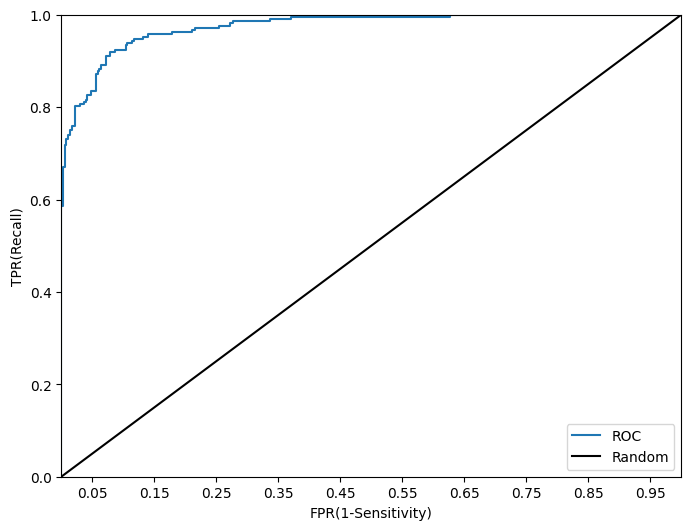

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,6))
fprs, tprs, thresholds=roc_curve(y, model_lor.predict_proba(X)[:,1])
plt.plot(fprs,tprs,label='ROC')
plt.plot([0,1],[0,1],'k-',label='Random')
start,end=plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR(1-Sensitivity)')
plt.ylabel('TPR(Recall)')
plt.legend()
plt.show()

**ROC AUC 값을 구하고 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, model_lor.predict_proba(X)[:,1])
#성능이 뛰어나다

np.float64(0.974076423022039)